In [ ]:
# logistic Regression 

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\StressLevelDataset .csv")
data.head(20)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [3]:
# Replace 'features' and 'target' with the appropriate column names in your dataset
X = data[['mental_health_history','depression','blood_pressure','sleep_quality','breathing_problem','noise_level','study_load','extracurricular_activities']]  # Features
y = data['stress_level']  # Target variable

In [5]:
print(X)

      mental_health_history  depression  blood_pressure  sleep_quality  \
0                         0          11               1              2   
1                         1          15               3              1   
2                         1          14               1              2   
3                         1          15               3              1   
4                         0           7               3              5   
...                     ...         ...             ...            ...   
1095                      0          14               1              3   
1096                      0           8               3              0   
1097                      0           3               2              5   
1098                      1          19               3              1   
1099                      1          15               3              0   

      breathing_problem  noise_level  study_load  extracurricular_activities  
0                     4         

In [6]:
print(y)

0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: stress_level, Length: 1100, dtype: int64


In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train)

      mental_health_history  depression  blood_pressure  sleep_quality  \
507                       0          10               1              2   
551                       0          13               1              2   
290                       1           2               3              3   
2                         1          14               1              2   
6                         0           6               2              4   
...                     ...         ...             ...            ...   
466                       1          23               3              1   
121                       1          18               3              1   
1044                      1          23               3              1   
1095                      0          14               1              3   
860                       1          11               1              3   

      breathing_problem  noise_level  study_load  extracurricular_activities  
507                   4         

In [9]:
print(X_test)

     mental_health_history  depression  blood_pressure  sleep_quality  \
328                      1          26               3              1   
688                      0           1               2              5   
413                      1           9               1              2   
788                      0          12               1              2   
244                      0           3               2              4   
..                     ...         ...             ...            ...   
319                      1           9               1              3   
979                      1          24               3              1   
919                      0           1               3              5   
989                      0          27               3              5   
724                      1           9               1              3   

     breathing_problem  noise_level  study_load  extracurricular_activities  
328                  5            3          

In [10]:
print(y_train)

507     1
551     1
290     0
2       1
6       0
       ..
466     2
121     2
1044    2
1095    1
860     1
Name: stress_level, Length: 880, dtype: int64


In [11]:
print(y_test)

328    2
688    0
413    1
788    1
244    0
      ..
319    1
979    2
919    2
989    0
724    1
Name: stress_level, Length: 220, dtype: int64


In [12]:

# Standardize the features by scaling them to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [14]:
# Predict on the testing set
y_pred = model.predict(X_test_scaled)


In [15]:
print(y_pred)

[2 0 1 1 0 1 2 0 1 0 0 0 0 2 2 0 0 2 1 0 1 0 0 1 1 2 0 0 0 0 2 2 2 0 0 1 2
 1 2 2 2 0 1 0 2 0 2 2 0 0 1 0 0 0 1 1 2 0 1 1 2 0 2 0 1 0 2 1 2 2 2 1 2 1
 0 0 1 0 1 0 1 0 0 1 1 2 2 2 2 1 0 0 0 1 2 0 0 0 1 1 2 0 0 2 0 2 1 2 1 2 2
 2 1 0 0 2 2 2 0 0 2 1 2 1 2 2 0 2 0 2 2 1 2 0 0 2 1 2 2 2 0 2 0 1 0 2 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 0 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 0 1 2 1 2 1 2 2 1 1 2 1 1 2 2 1 0 0 1 2 2 2 2 0 2 1 2 0 0 1 2 2 0 1]


In [17]:
predictions_df = pd.DataFrame({
    'Actual state of charging': (y_test),# current load other name state of health

    'Predicted state of charging ': (y_pred)
})

# Display the DataFrame
print(predictions_df)

     Actual state of charging  Predicted state of charging 
328                         2                             2
688                         0                             0
413                         1                             1
788                         1                             1
244                         0                             0
..                        ...                           ...
319                         1                             1
979                         2                             2
919                         2                             2
989                         0                             0
724                         1                             1

[220 rows x 2 columns]


In [18]:
from sklearn.metrics import accuracy_score


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8772727272727273


In [20]:
#  classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        76
           1       0.98      0.85      0.91        73
           2       0.82      0.90      0.86        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



In [22]:
import matplotlib.pyplot as plt

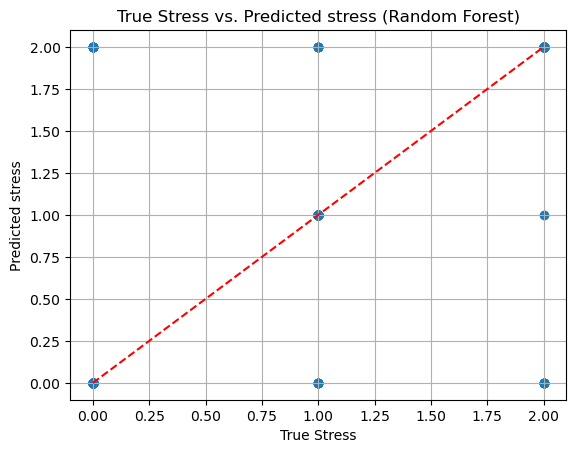

In [24]:
# Plot the true stess values vs. predicted stress values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('True Stress')
plt.ylabel('Predicted stress')
plt.title('True Stress vs. Predicted stress (Random Forest)')
plt.grid(True)
plt.show()

In [25]:
print(y_test)

328    2
688    0
413    1
788    1
244    0
      ..
319    1
979    2
919    2
989    0
724    1
Name: stress_level, Length: 220, dtype: int64


In [26]:
print(y_pred)

[2 0 1 1 0 1 2 0 1 0 0 0 0 2 2 0 0 2 1 0 1 0 0 1 1 2 0 0 0 0 2 2 2 0 0 1 2
 1 2 2 2 0 1 0 2 0 2 2 0 0 1 0 0 0 1 1 2 0 1 1 2 0 2 0 1 0 2 1 2 2 2 1 2 1
 0 0 1 0 1 0 1 0 0 1 1 2 2 2 2 1 0 0 0 1 2 0 0 0 1 1 2 0 0 2 0 2 1 2 1 2 2
 2 1 0 0 2 2 2 0 0 2 1 2 1 2 2 0 2 0 2 2 1 2 0 0 2 1 2 2 2 0 2 0 1 0 2 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 0 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 0 1 2 1 2 1 2 2 1 1 2 1 1 2 2 1 0 0 1 2 2 2 2 0 2 1 2 0 0 1 2 2 0 1]


In [27]:
 #Convert predictions and true labels to binary format
# let's assume we're interested in binary classification where 1 is positive and 0 is negative
threshold = 0.5  # You can adjust this threshold based on your problem
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]
y_true_binary = [1 if true >= threshold else 0 for true in y_test]

In [28]:
print(y_pred_binary)

[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]


In [29]:
print(y_true_binary)

[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]


In [33]:
from sklearn.metrics import confusion_matrix, f1_score

In [36]:
cm = confusion_matrix(y_true_binary,y_pred_binary )

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 67   9]
 [ 12 132]]


In [37]:
import seaborn as sns

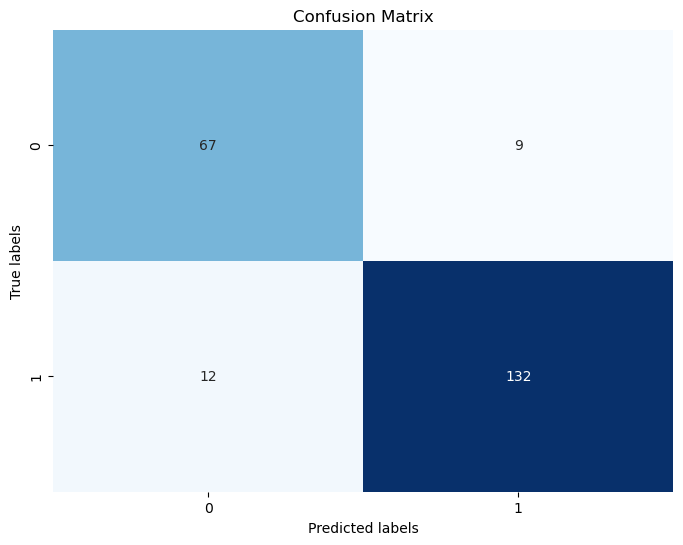

In [38]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [39]:
from sklearn.metrics import f1_score

In [40]:
# Calculate F1 score
f1 = f1_score(y_true_binary, y_pred_binary, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9049668158666462


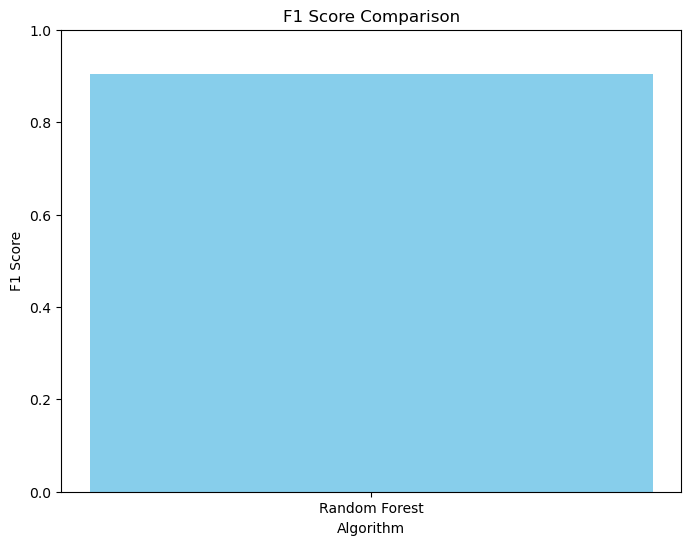

In [41]:
# Plot F1 score
plt.figure(figsize=(8, 6))
plt.bar(["Random Forest"], [f1], color='skyblue')
plt.title("F1 Score Comparison")
plt.xlabel("Algorithm")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()